<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd

Load the dataset into a dataframe.


In [20]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


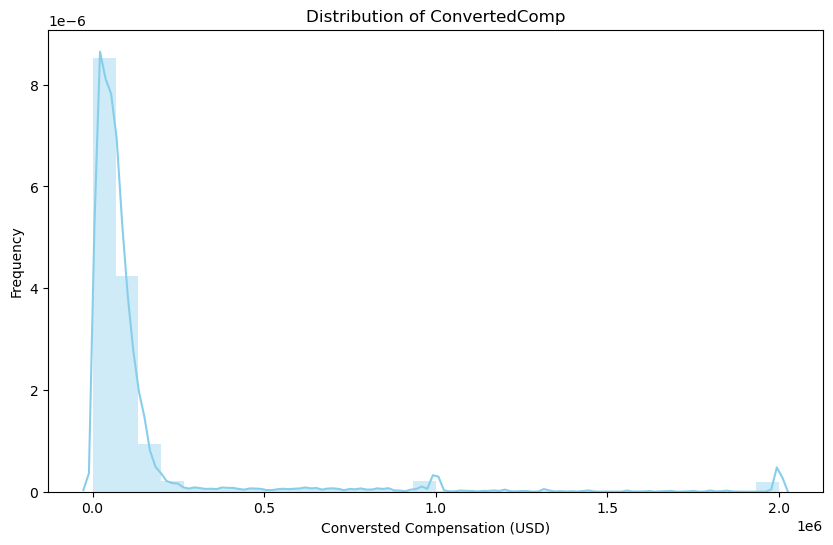

In [21]:
# Import the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution curve
plt.figure(figsize=(10, 6))
sns.distplot(df['ConvertedComp'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of ConvertedComp')
plt.xlabel('Conversted Compensation (USD)')
plt.ylabel('Frequency')
plt.show()


Plot the histogram for the column `ConvertedComp`.


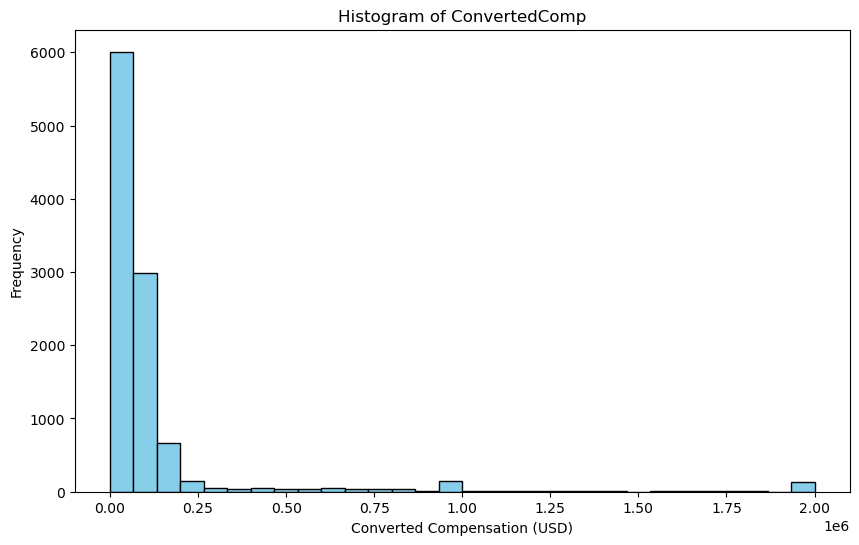

In [22]:
# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(df['ConvertedComp'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of ConvertedComp')
plt.xlabel('Converted Compensation (USD)')
plt.ylabel('Frequency')
plt.show()


What is the median of the column `ConvertedComp`?


In [23]:
# Find the median for the ConvertedComp column
median_salary = df['ConvertedComp'].median()

print(f"The median ConvertedComp is: {median_salary} USD")


The median ConvertedComp is: 57745.0 USD


In [45]:
# Find the median age of survey respondents
median_age = df['Age'].median()

# Display the median age
print(f"The median age of survey respondents is: {median_age} years")

The median age of survey respondents is: 29.0 years


How many responders identified themselves only as a **Man**?


In [24]:
# Filter for only 'Man' Gender column values
man_responders = df[df['Gender'] == 'Man']

# Determine the number of reponders
number_man_responders = len(man_responders)

# Display the number of 'Man' responders
print(f"The number of responders identifying themselves only as 'Man' is: {number_man_responders}")


The number of responders identifying themselves only as 'Man' is: 10480


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [25]:
# Filter for only 'Woman' Gender column values
woman_responders = df[df['Gender'] == 'Woman']

# Determine the median of  'Woman' reponders
woman_responders_median = woman_responders['ConvertedComp'].median()

# Display median for 'Woman' responders
print(f"The median ConvertedComp for the 'Woman' responders is: {woman_responders_median}")

The median ConvertedComp for the 'Woman' responders is: 57708.0


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [26]:
# Get the five-number summary for the 'Age' column
five_number_summary = df['Age'].describe(percentiles=[.25, .5, .75])

# Display the five-number summary
print(five_number_summary)

count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64


Plot a histogram of the column `Age`.


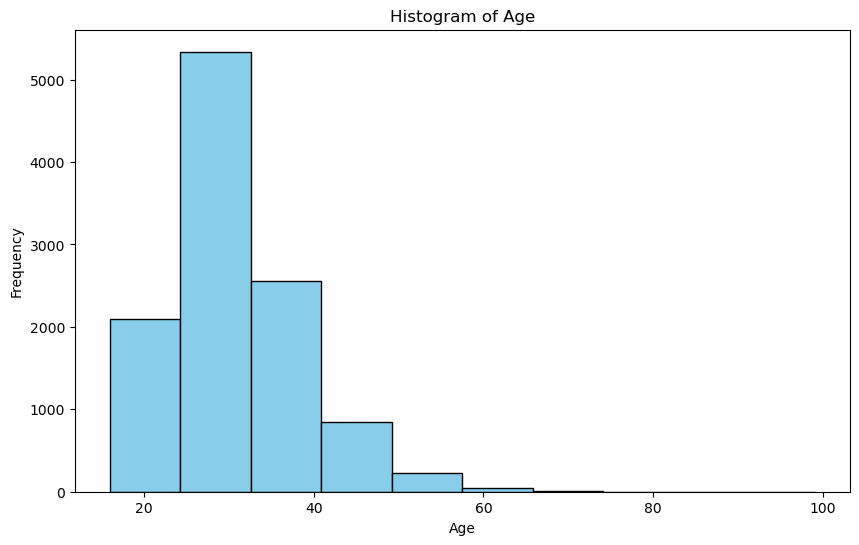

In [27]:
# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=10, color='skyblue', edgecolor='black')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


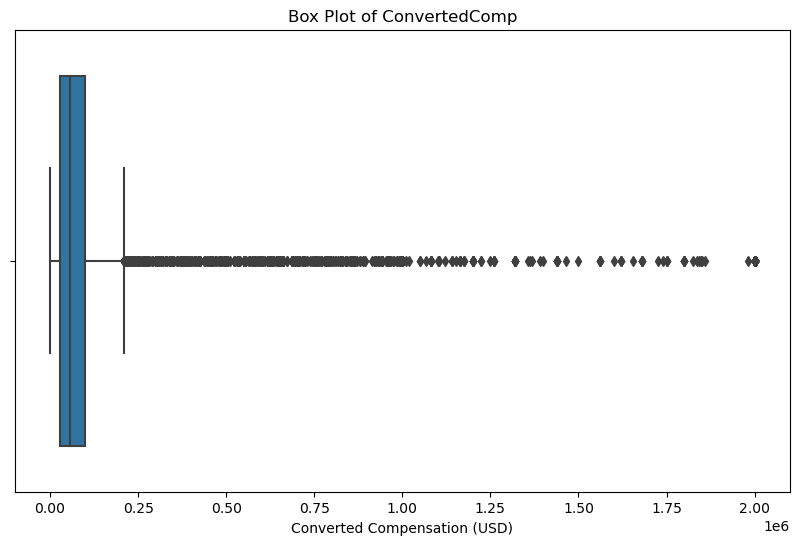

In [33]:
# Create a box plot for the 'ConvertedComp' column using seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['ConvertedComp'])
plt.title('Box Plot of ConvertedComp')
plt.xlabel('Converted Compensation (USD)')
plt.show()

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [38]:
converted_comp_column = df['ConvertedComp']

# Calculate the IQR (Interquartile Range)
Q1 = converted_comp_column.quantile(0.25)
Q3 = converted_comp_column.quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = (converted_comp_column < lower_bound) | (converted_comp_column > upper_bound)

# Count the number of outliers
num_outliers = outliers.sum()

# Display the count of outliers
print(f'Number of outliers in ConvertedComp: {num_outliers}')

Number of outliers in ConvertedComp: 879


Find out the upper and lower bounds.


In [39]:
print(f'Lower bound for outliers: {lower_bound} USD')
print(f'Upper bound for outliers: {upper_bound} USD')


Lower bound for outliers: -82830.0 USD
Upper bound for outliers: 209698.0 USD


Identify how many outliers are there in the `ConvertedComp` column.


In [40]:
# Display the count of outliers
print(f'Number of outliers in ConvertedComp: {num_outliers}')

Number of outliers in ConvertedComp: 879


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [49]:
# Create a new DataFrame without outliers
df_no_outliers = df[(converted_comp_column >= lower_bound) & (converted_comp_column <= upper_bound)]

# Display the new DataFrame without outliers
print("DataFrame without outliers:")
print(len(df_no_outliers))

# Find the median for the ConvertedComp column after removing outliers
median_salary_no_outliers = df_no_outliers['ConvertedComp'].median()

# Display the median for the ConvertedComp column after removing outliers
print(f"The median ConvertedComp with no outliers is: {median_salary_no_outliers} USD")

# Find the mean for the ConvertedComp column after removing outliers
mean_salary_no_outliers = df_no_outliers['ConvertedComp'].mean()

# Display the mean for the ConvertedComp column after removing outliers
print(f"The medean ConvertedComp with no outliers is: {mean_salary_no_outliers} USD")

DataFrame without outliers:
9703
The median ConvertedComp with no outliers is: 52704.0 USD
The medean ConvertedComp with no outliers is: 59883.20838915799 USD


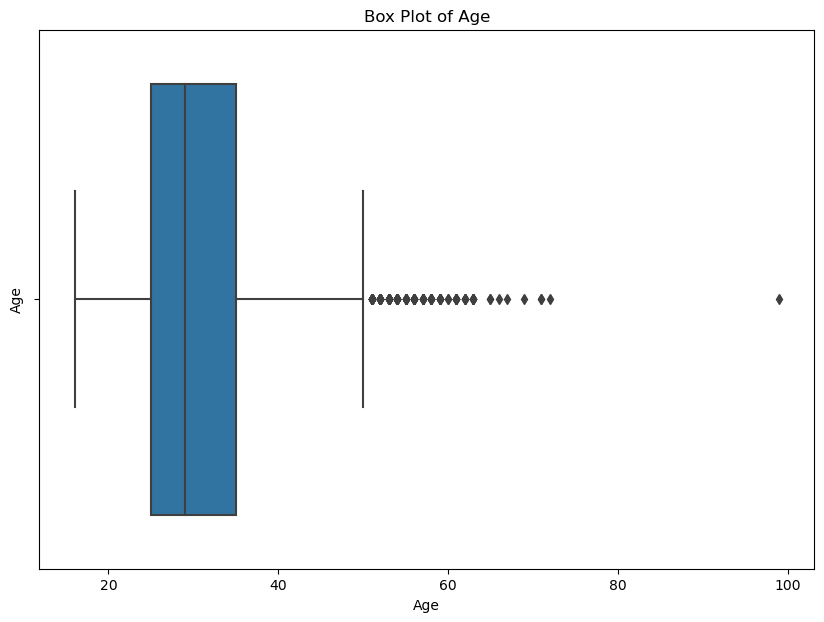

In [53]:
# Create a box plot for the 'Age' column using seaborn
plt.figure(figsize=(10, 7))
sns.boxplot(x=df['Age'])
plt.title('Box Plot of Age')
plt.ylabel('Age')
plt.show()

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [44]:
# Find the correlation matrix
correlation_matrix = df.corr()

# Extract the correlation between 'Age' and all other numerical columns
correlation_with_age = correlation_matrix['Age']

# Display the correlation
print("Correlation between Age and other numerical columns:")
print(correlation_with_age)

Correlation between Age and other numerical columns:
Respondent       0.004041
CompTotal        0.006970
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CodeRevHrs      -0.020469
Age              1.000000
Name: Age, dtype: float64


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
